In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import precision_recall_curve, average_precision_score, precision_score, recall_score, f1_score, accuracy_score, auc, roc_curve

### Held-Out Evaluation

In [2]:
version = 'v10'
predict = pd.read_csv('predict/data_'+version+'/cnn_def/predict_result.tsv', sep='\t', header=None, names=['kb_desc', 'oie_rel', 'dist', 'label'], quoting=csv.QUOTE_NONE)
predict_ent = pd.read_csv('predict/data_'+version+'/cnn_defent/predict_result.tsv', sep='\t', header=None, names=['kb_desc', 'oie_rel', 'dist', 'label'], quoting=csv.QUOTE_NONE)
predict_base = pd.read_csv('predict/data_'+version+'/cnn_nodef/predict_result.tsv', sep='\t', header=None, names=['kb_desc', 'oie_rel', 'dist', 'label'], quoting=csv.QUOTE_NONE)
predict_pcnn_ent = pd.read_csv('predict/data_'+version+'/pcnn_defent/predict_result.tsv', sep='\t', header=None, names=['kb_desc', 'oie_rel', 'dist', 'label'], quoting=csv.QUOTE_NONE)
# predict_pcnn_att = pd.read_csv('predict/data_'+version+'/pcnn_att/predict_result.tsv', sep='\t', header=None, names=['kb_desc', 'oie_rel', 'dist', 'label'], quoting=csv.QUOTE_NONE)
predict_pcnn_nodef = pd.read_csv('predict/data_'+version+'/pcnn_nodef/predict_result.tsv', sep='\t', header=None, names=['kb_desc', 'oie_rel', 'dist', 'label'], quoting=csv.QUOTE_NONE)

In [3]:
def get_pred(dist, thres):
    if dist <= thres:
        return 0
    else:
        return 1

def get_prec_recall(gold, dist):
    thres = [0.25]
    num = 0
    for i in range(30):
        num = round(num + 0.25, 1)
        thres.append(num)
#     thres = [0.05, 0.15, 0.25, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5,
#          5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9]
    
    prec = [1]
    rec = [0]
    for t in thres:
        pred = [get_pred(d, t) for d in dist]
        prec_score = precision_score(gold, pred, pos_label=0, average='binary') 
        prec.append(prec_score)
        rec.append(recall_score(gold, pred, pos_label=0, average='binary'))
    
    return prec, rec, thres

In [4]:
# Calculate model performance
label = np.array(predict['label'], dtype=int)
label_scores = np.array(predict['dist'])
# precision, recall, thresholds = precision_recall_curve(label, label_scores, pos_label=1)
precision, recall, thresholds = get_prec_recall(label, label_scores)

label_ent = np.array(predict_ent['label'], dtype=int)
label_scores_ent = np.array(predict_ent['dist'])
# precision_ent, recall_ent, thresholds_ent = precision_recall_curve(label_ent, label_scores_ent, pos_label=1)
precision_ent, recall_ent, thresholds_ent = get_prec_recall(label_ent, label_scores_ent)

label_pcnn_ent = np.array(predict_pcnn_ent['label'], dtype=int)
label_scores_pcnn_ent = np.array(predict_pcnn_ent['dist'])
# precision_pcnn_ent, recall_pcnn_ent, thresholds_pcnn_ent = precision_recall_curve(label_pcnn_ent, label_scores_pcnn_ent, pos_label=1)
precision_pcnn_ent, recall_pcnn_ent, thresholds_pcnn_ent = get_prec_recall(label_pcnn_ent, label_scores_pcnn_ent)

# label_pcnn_att = np.array(predict_pcnn_att['label'], dtype=int)
# label_scores_pcnn_att = np.array(predict_pcnn_att['dist'])
# precision_pcnn_att, recall_pcnn_att, thresholds_pcnn_att = precision_recall_curve(label_pcnn_att, label_scores_pcnn_att)
# precision_pcnn_att, recall_pcnn_att, thresholds_pcnn_att = get_prec_recall(label_pcnn_att, label_scores_pcnn_att)

label_pcnn_nodef = np.array(predict_pcnn_nodef['label'], dtype=int)
label_scores_pcnn_nodef = np.array(predict_pcnn_nodef['dist'])
# precision_pcnn_nodef, recall_pcnn_nodef, thresholds_pcnn_nodef = precision_recall_curve(label_pcnn_nodef, label_scores_pcnn_nodef, pos_label=1)
precision_pcnn_nodef, recall_pcnn_nodef, thresholds_pcnn_nodef = get_prec_recall(label_pcnn_nodef, label_scores_pcnn_nodef)

# Calculate baseline performance
label_base = np.array(predict_base['label'], dtype=int)
label_scores_base = np.array(predict_base['dist'])
# precision_base, recall_base, thresholds_base = precision_recall_curve(label_base, label_scores_base, pos_label=1)
precision_base, recall_base, thresholds_base = get_prec_recall(label_base, label_scores_base)

In [5]:
len(precision_base), len(recall_base), len(thresholds_base)

(32, 32, 31)

<Figure size 432x288 with 0 Axes>

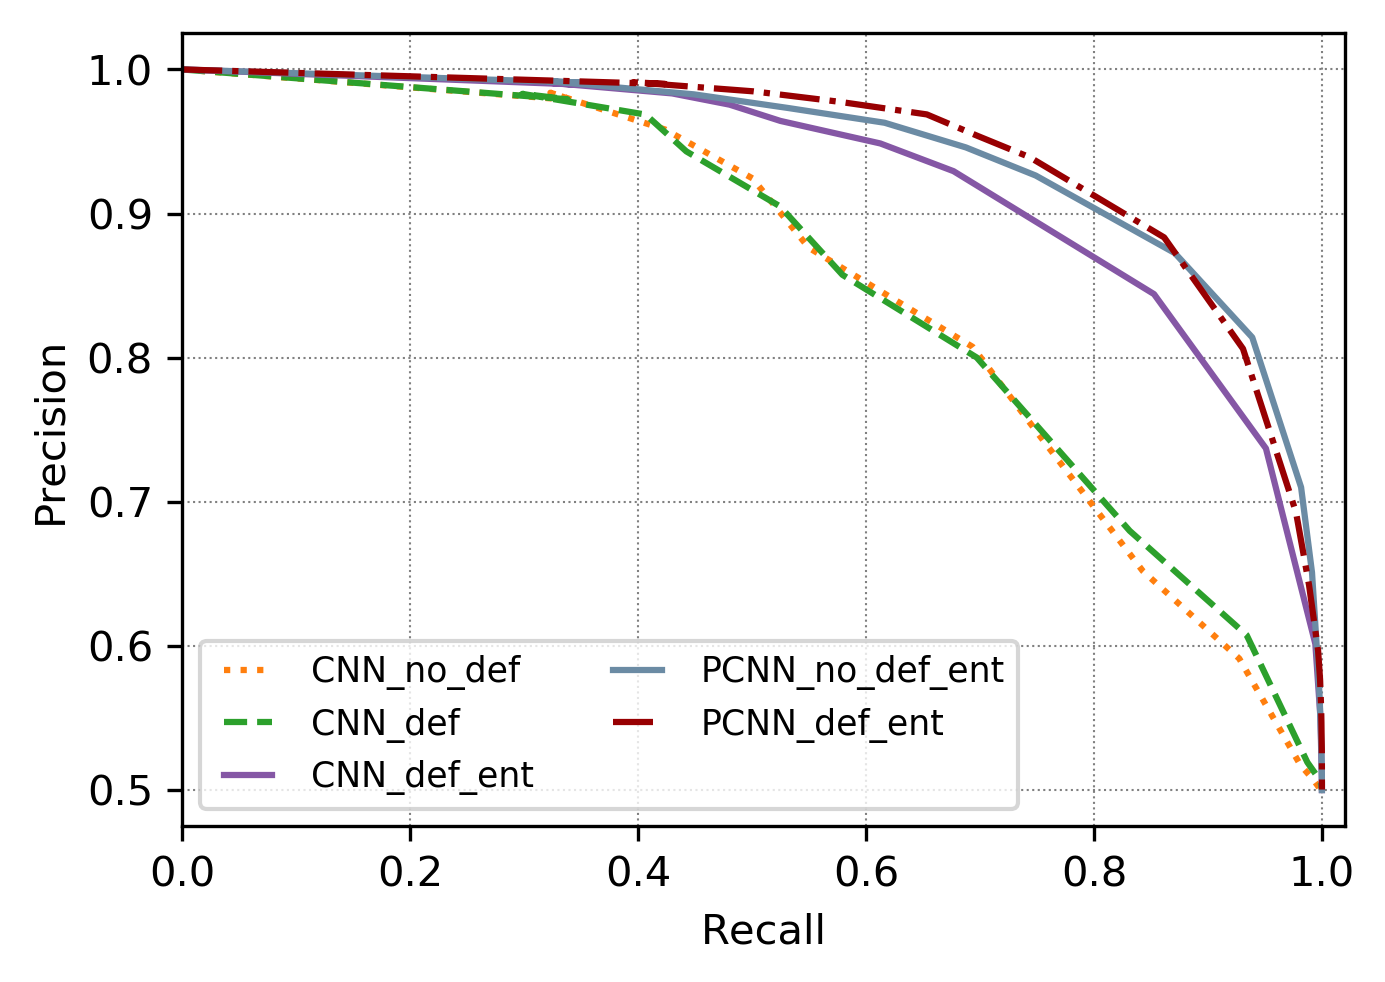

In [6]:
# Plot Precision-Recall curve
plt.clf()
plt.figure(dpi=300, figsize=(5, 3.5))
plt.plot(recall_base, precision_base, color='C1', ls=':', label='CNN_no_def')
plt.plot(recall, precision, color='C2', ls='--', label='CNN_def')
plt.plot(recall_ent, precision_ent, color='#8557a5', ls='-', label='CNN_def_ent')
plt.plot(recall_pcnn_nodef, precision_pcnn_nodef, color='#6b8ba4', ls='-', label='PCNN_no_def_ent')
plt.plot(recall_pcnn_ent, precision_pcnn_ent, color='#980002', ls='-.', label='PCNN_def_ent')
# plt.plot(recall_pcnn_att, precision_pcnn_att, color='C5', ls='-', label='PCNN_att')

plt.xlabel('Recall')
plt.ylabel('Precision')
# plt.title('Precision-Recall Curve (Held-out)')
plt.grid(color='grey', lw=0.5, linestyle='dotted')
plt.xlim((0, 1.02))
# plt.ylim((0.6, 1.01))
# plt.legend(loc='lower left')

plt.legend(loc='best', numpoints=2, ncol=2, fancybox = True,
           fontsize='small', labels=['CNN_no_def', 'CNN_def', 'CNN_def_ent', 'PCNN_no_def_ent', 'PCNN_def_ent'])
plt.show()

In [7]:
average_precision_score(label_base, label_scores_base), average_precision_score(label, label_scores), average_precision_score(label_ent, label_scores_ent), average_precision_score(label_pcnn_ent, label_scores_pcnn_ent), average_precision_score(label_pcnn_nodef, label_scores_pcnn_nodef)

(0.7807095271017066,
 0.8088412834635633,
 0.9297729320882847,
 0.9456349812208343,
 0.9472681037814504)

### Manual Evaluation

In [8]:
predict_g = pd.read_csv('predict/data_'+version+'/gold/cnn_def/predict_result.tsv', sep='\t', header=None, names=['kb_desc', 'oie_rel', 'dist', 'label'], quoting=csv.QUOTE_NONE)
predict_ent_g = pd.read_csv('predict/data_'+version+'/gold/cnn_defent/predict_result.tsv', sep='\t', header=None, names=['kb_desc', 'oie_rel', 'dist', 'label'], quoting=csv.QUOTE_NONE)
predict_base_g = pd.read_csv('predict/data_'+version+'/gold/cnn_nodef/predict_result.tsv', sep='\t', header=None, names=['kb_desc', 'oie_rel', 'dist', 'label'], quoting=csv.QUOTE_NONE)
predict_pcnn_ent_g = pd.read_csv('predict/data_'+version+'/gold/pcnn_defent/predict_result.tsv', sep='\t', header=None, names=['kb_desc', 'oie_rel', 'dist', 'label'], quoting=csv.QUOTE_NONE)
# predict_pcnn_att_g = pd.read_csv('predict/data_'+version+'/gold/pcnn_att/predict_result.tsv', sep='\t', header=None, names=['kb_desc', 'oie_rel', 'dist', 'label'], quoting=csv.QUOTE_NONE)
predict_pcnn_nodef_g = pd.read_csv('predict/data_'+version+'/gold/pcnn_nodef/predict_result.tsv', sep='\t', header=None, names=['kb_desc', 'oie_rel', 'dist', 'label'], quoting=csv.QUOTE_NONE)

In [9]:
# Calculate model performance
label_g = np.array(predict_g['label'], dtype=int)
label_scores_g = np.array(predict_g['dist'])
# precision_g, recall_g, thresholds_g = precision_recall_curve(label_g, label_scores_g, pos_label=0)
precision_g, recall_g, thresholds_g = get_prec_recall(label_g, label_scores_g)

label_ent_g = np.array(predict_ent_g['label'], dtype=int)
label_scores_ent_g = np.array(predict_ent_g['dist'])
# precision_ent_g, recall_ent_g, thresholds_ent_g = precision_recall_curve(label_ent_g, label_scores_ent_g, pos_label=0)
precision_ent_g, recall_ent_g, thresholds_ent_g = get_prec_recall(label_ent_g, label_scores_ent_g)

label_pcnn_ent_g = np.array(predict_pcnn_ent_g['label'], dtype=int)
label_scores_pcnn_ent_g = np.array(predict_pcnn_ent_g['dist'])
# precision_pcnn_ent_g, recall_pcnn_ent_g, thresholds_pcnn_ent_g = precision_recall_curve(label_pcnn_ent_g, label_scores_pcnn_ent_g, pos_label=0)
precision_pcnn_ent_g, recall_pcnn_ent_g, thresholds_pcnn_ent_g = get_prec_recall(label_pcnn_ent_g, label_scores_pcnn_ent_g)

# label_pcnn_att_g = np.array(predict_pcnn_att_g['label'], dtype=int)
# label_scores_pcnn_att_g = np.array(predict_pcnn_att_g['dist'])
# precision_pcnn_att_g, recall_pcnn_att_g, thresholds_pcnn_att_g = precision_recall_curve(label_pcnn_att_g, label_scores_pcnn_att_g, pos_label=0)
# precision_pcnn_att_g, recall_pcnn_att_g, thresholds_pcnn_att_g = get_prec_recall(label_pcnn_att_g, label_scores_pcnn_att_g)

label_pcnn_nodef_g = np.array(predict_pcnn_nodef_g['label'], dtype=int)
label_scores_pcnn_nodef_g = np.array(predict_pcnn_nodef_g['dist'])
# precision_pcnn_nodef_g, recall_pcnn_nodef_g, thresholds_pcnn_nodef_g = precision_recall_curve(label_pcnn_nodef_g, label_scores_pcnn_nodef_g, pos_label=0)
precision_pcnn_nodef_g, recall_pcnn_nodef_g, thresholds_pcnn_nodef_g = get_prec_recall(label_pcnn_nodef_g, label_scores_pcnn_nodef_g)

# Calculate baseline performance
label_base_g = np.array(predict_base_g['label'], dtype=int)
label_scores_base_g = np.array(predict_base_g['dist'])
# precision_base_g, recall_base_g, thresholds_base_g = precision_recall_curve(label_base_g, label_scores_base_g, pos_label=0)
precision_base_g, recall_base_g, thresholds_base_g = get_prec_recall(label_base_g, label_scores_base_g)

<Figure size 432x288 with 0 Axes>

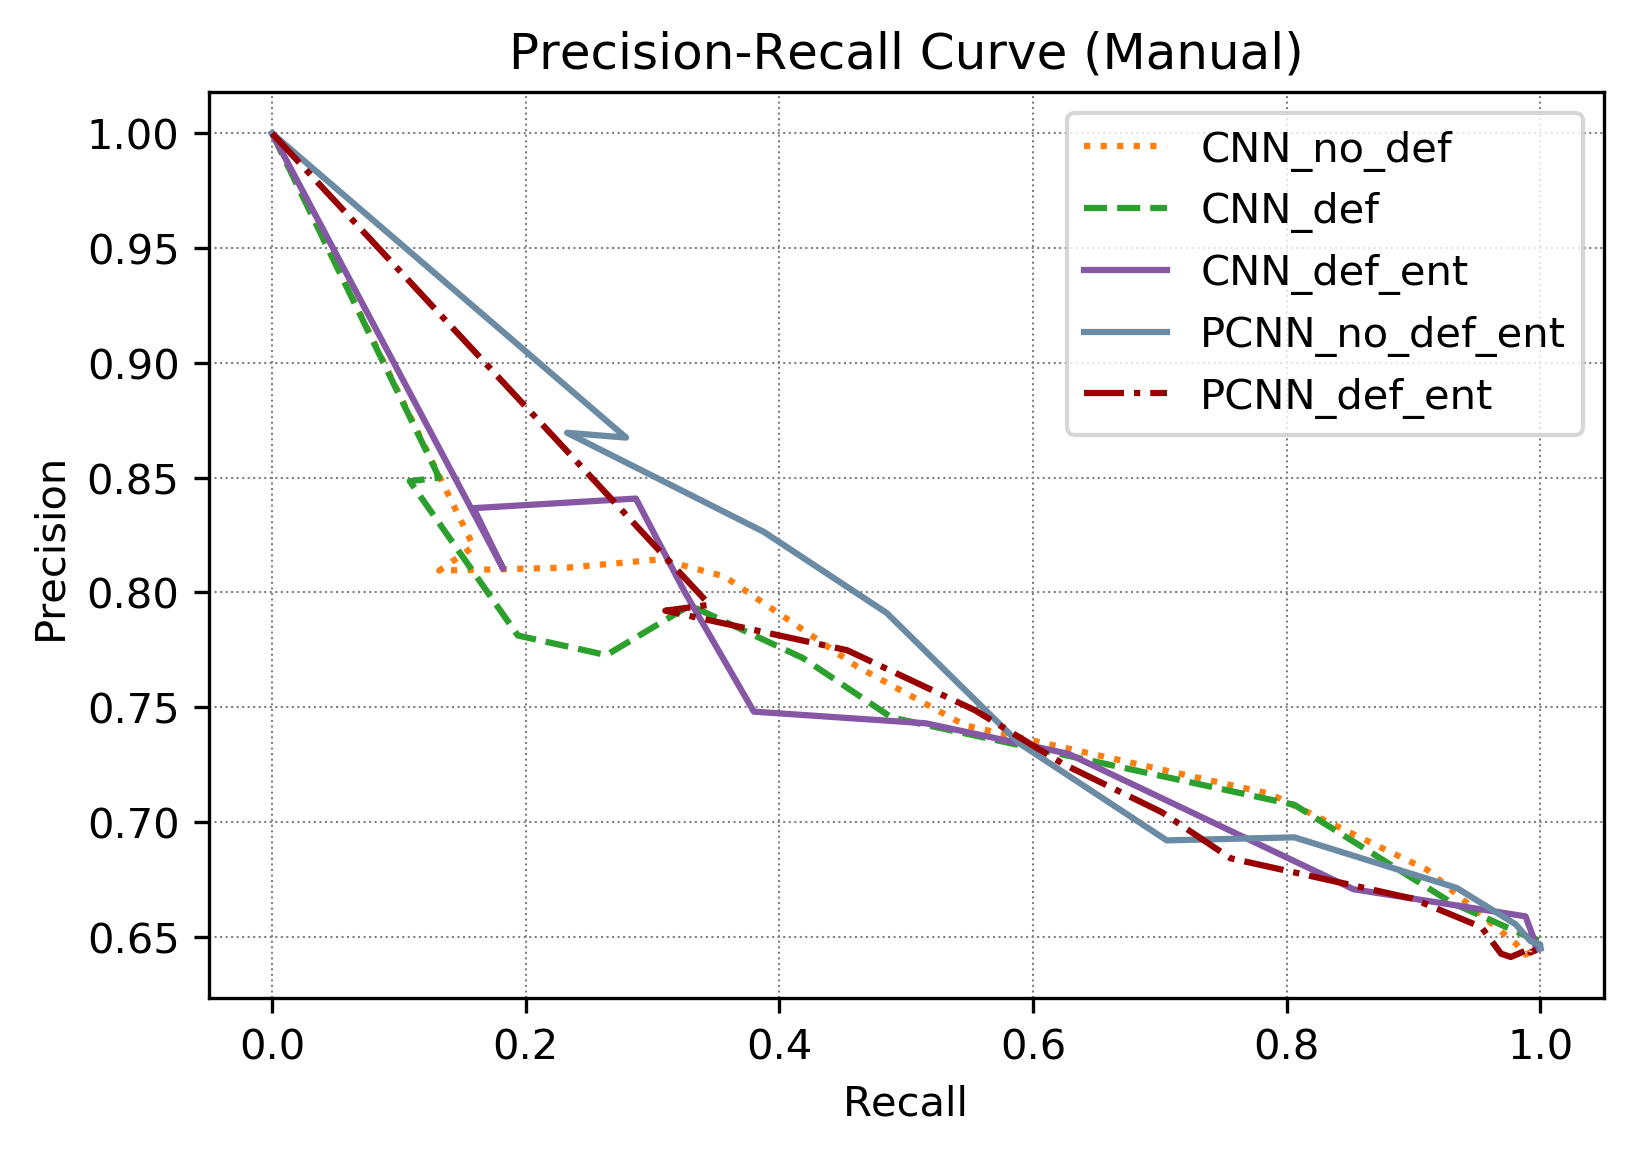

In [10]:
# Plot Precision-Recall curve
plt.clf()
plt.figure(dpi=300)
plt.plot(recall_base_g, precision_base_g, color='C1', ls=':', label='CNN_no_def')
plt.plot(recall_g, precision_g, color='C2', ls='--', label='CNN_def')
plt.plot(recall_ent_g, precision_ent_g, color='#8557a5', ls='-', label='CNN_def_ent')
plt.plot(recall_pcnn_nodef_g, precision_pcnn_nodef_g, color='#6b8ba4', ls='-', label='PCNN_no_def_ent')
plt.plot(recall_pcnn_ent_g, precision_pcnn_ent_g, color='#980002', ls='-.', label='PCNN_def_ent')
# plt.plot(recall_pcnn_att_g, precision_pcnn_att_g, lw=1, color='C5', ls='-', label='PCNN_att')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Manual)')
plt.grid(color='grey', lw=0.5, linestyle='dotted')
plt.legend(loc='best')
plt.show()

In [11]:
average_precision_score(label_base_g, label_scores_base_g), average_precision_score(label_g, label_scores_g), average_precision_score(label_ent_g, label_scores_ent_g), average_precision_score(label_pcnn_ent_g, label_scores_pcnn_ent_g)

(0.47195260724939514,
 0.4899869579823181,
 0.4867441222794293,
 0.4478049484811392)

### Decision Threshold

In [12]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds, title):
    """
    Modified from:
    Hands-On Machine learning with Scikit-Learn
    and TensorFlow; p.89
    """
    prec = precisions[:-1]
    rec = recalls[:-1]
    plt.figure(dpi=300)
    plt.grid(color='grey', lw=0.5, linestyle='dotted')
#     plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.title(title)
    plt.plot(thresholds, prec, color='#980002', ls='--', label="Precision")
    plt.plot(thresholds, rec, color='#6b8ba4', ls='-', label="Recall")
    plt.ylabel("Precision/Recall Score")
    plt.xlabel("Decision Threshold (Distance)")
#     plt.xlim((-0.5, 15.5))
    plt.legend(loc='lower left')

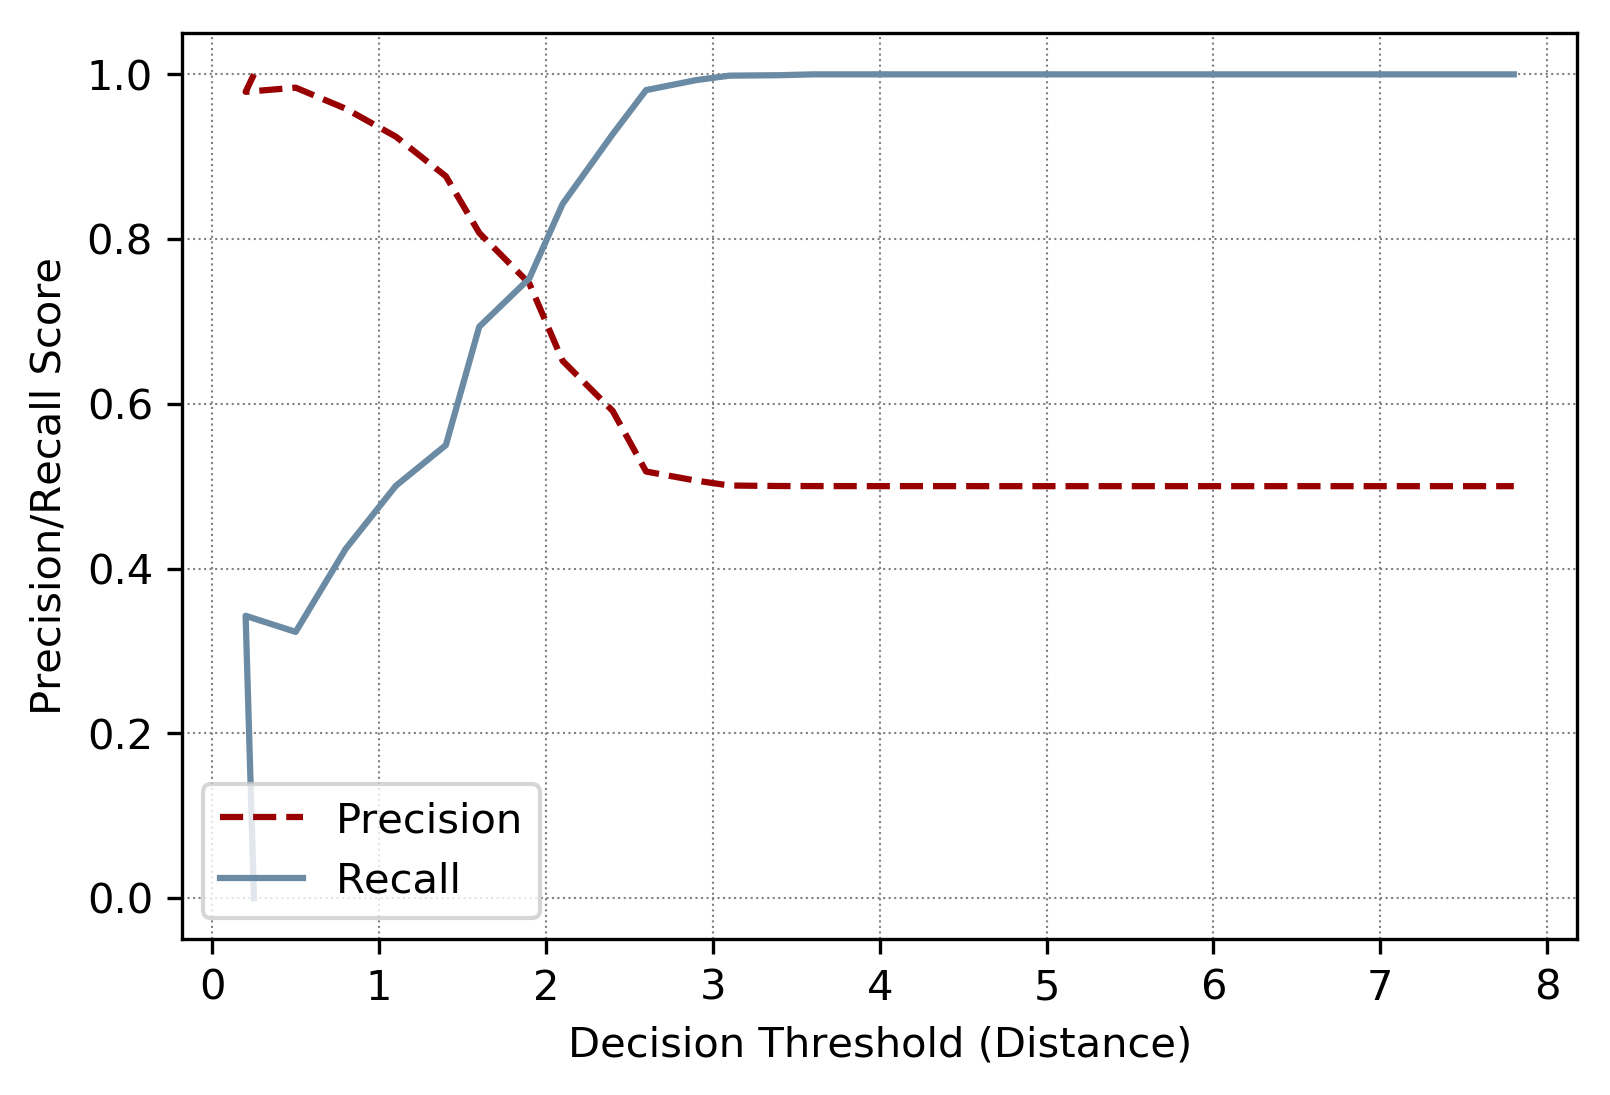

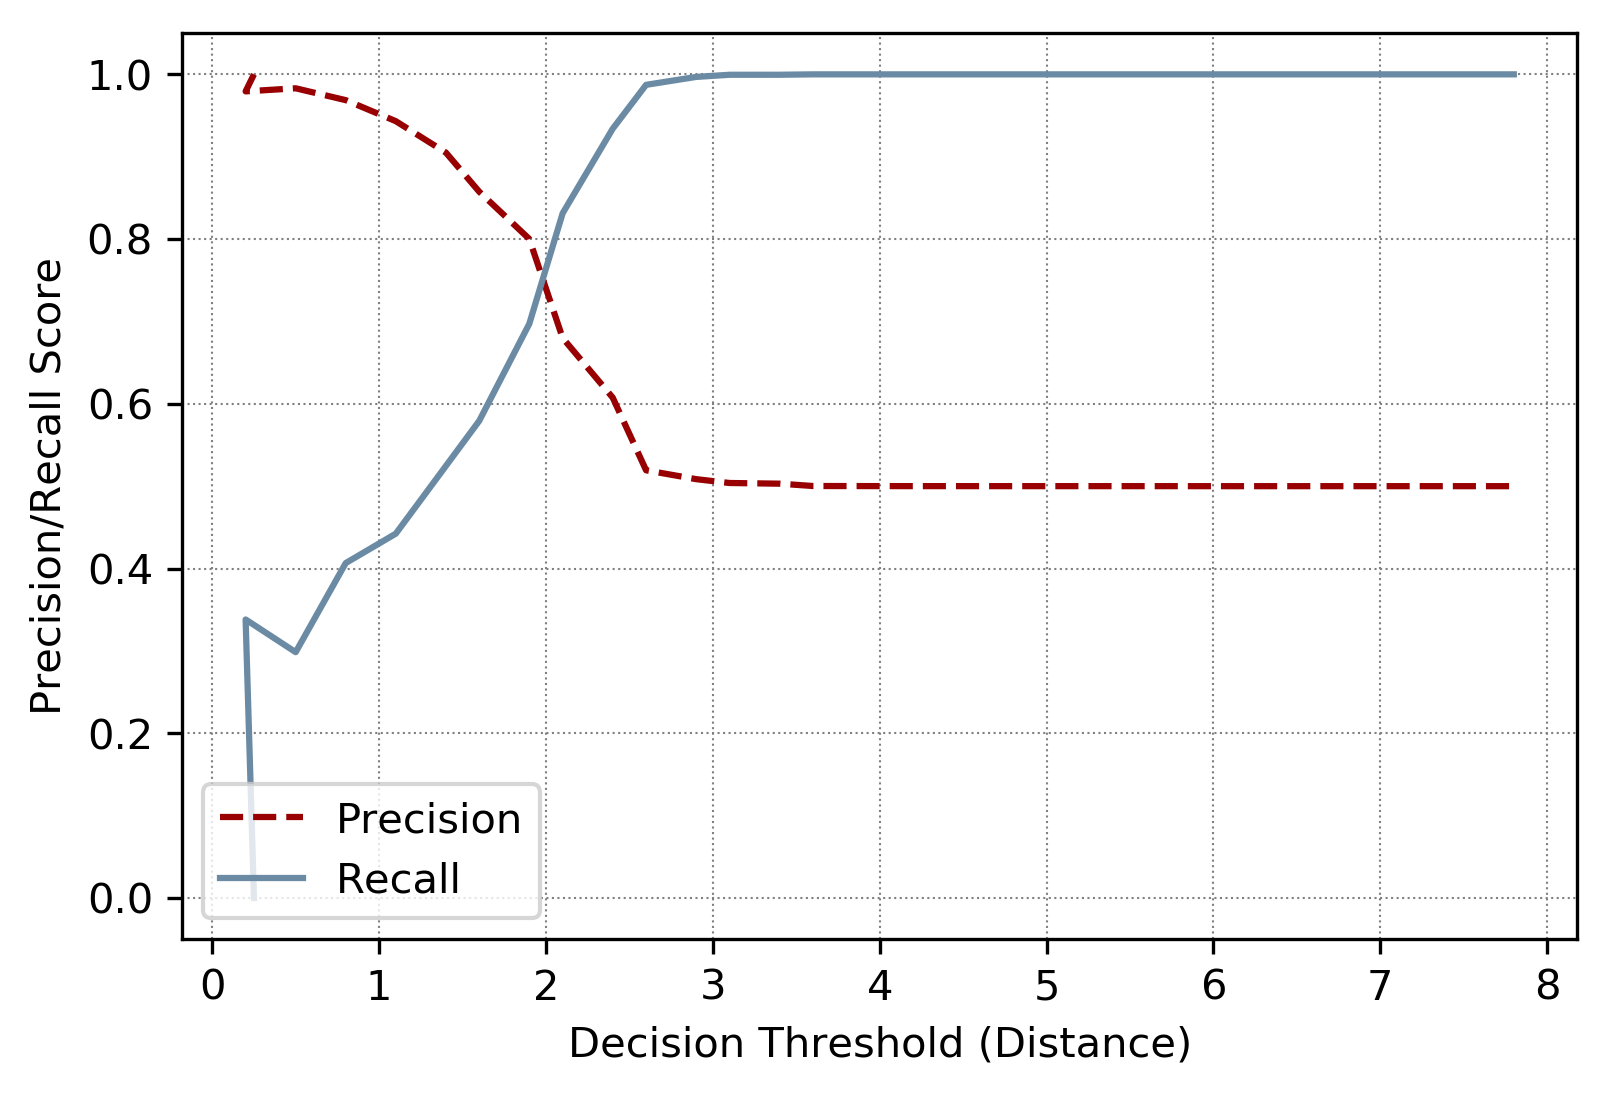

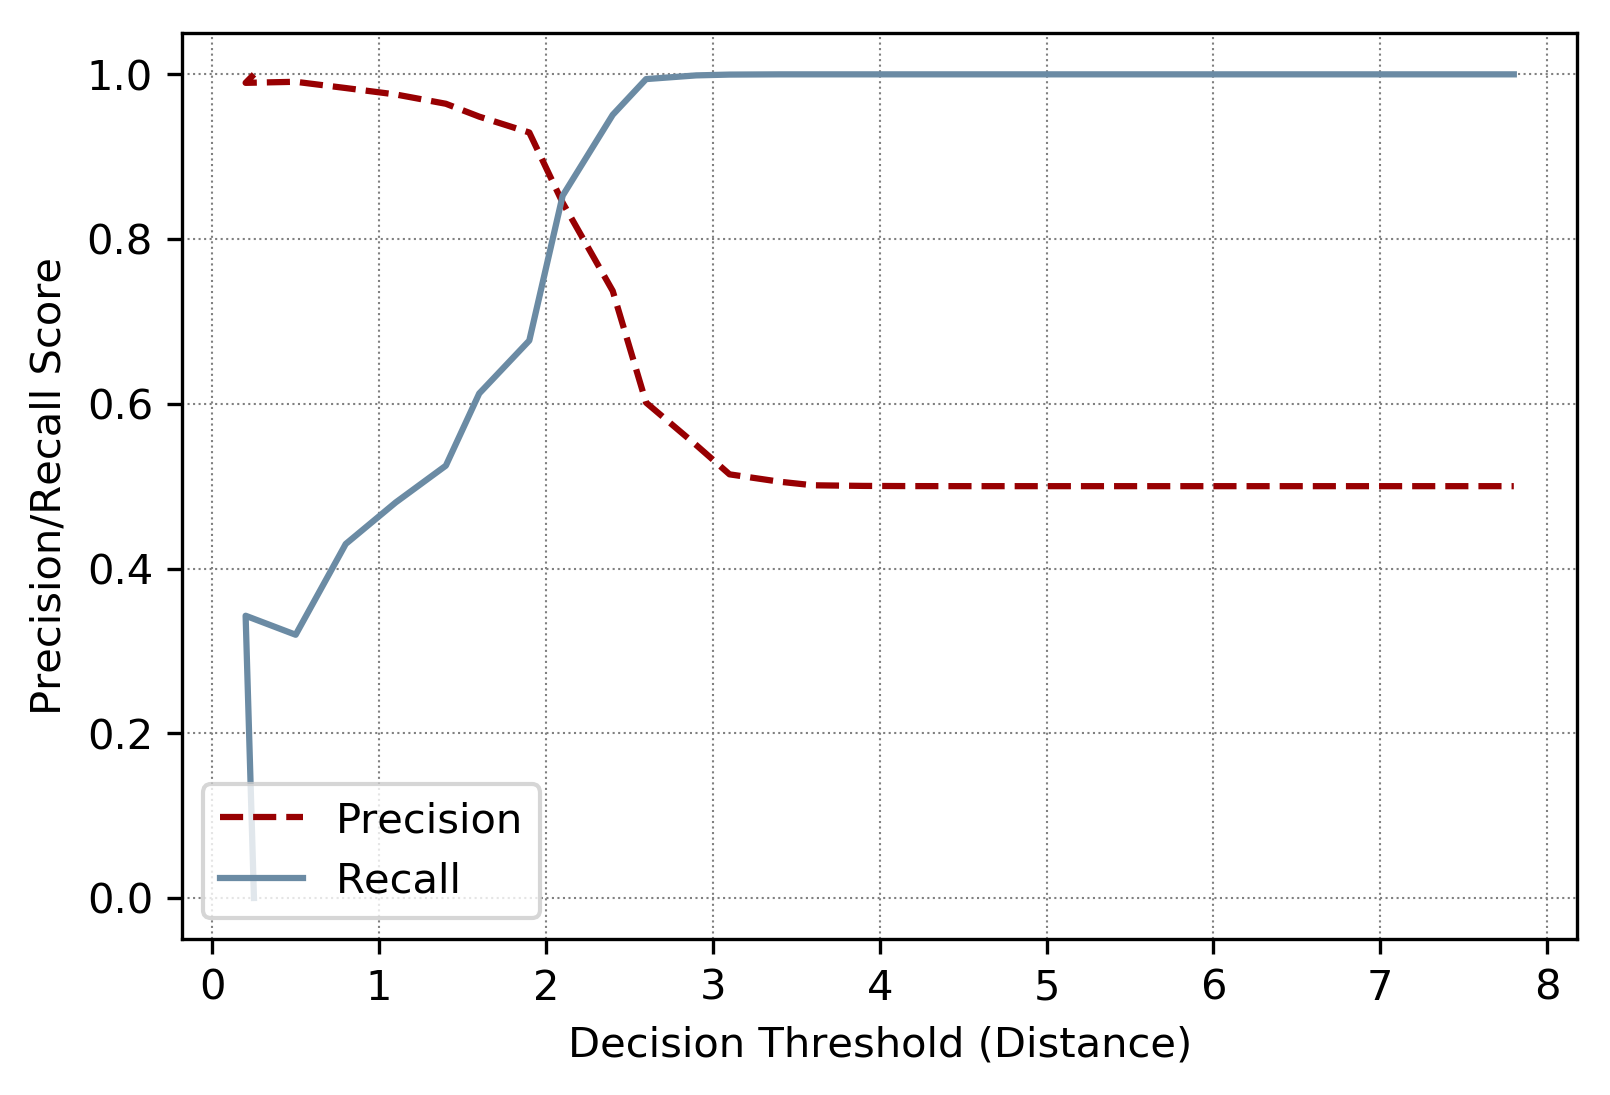

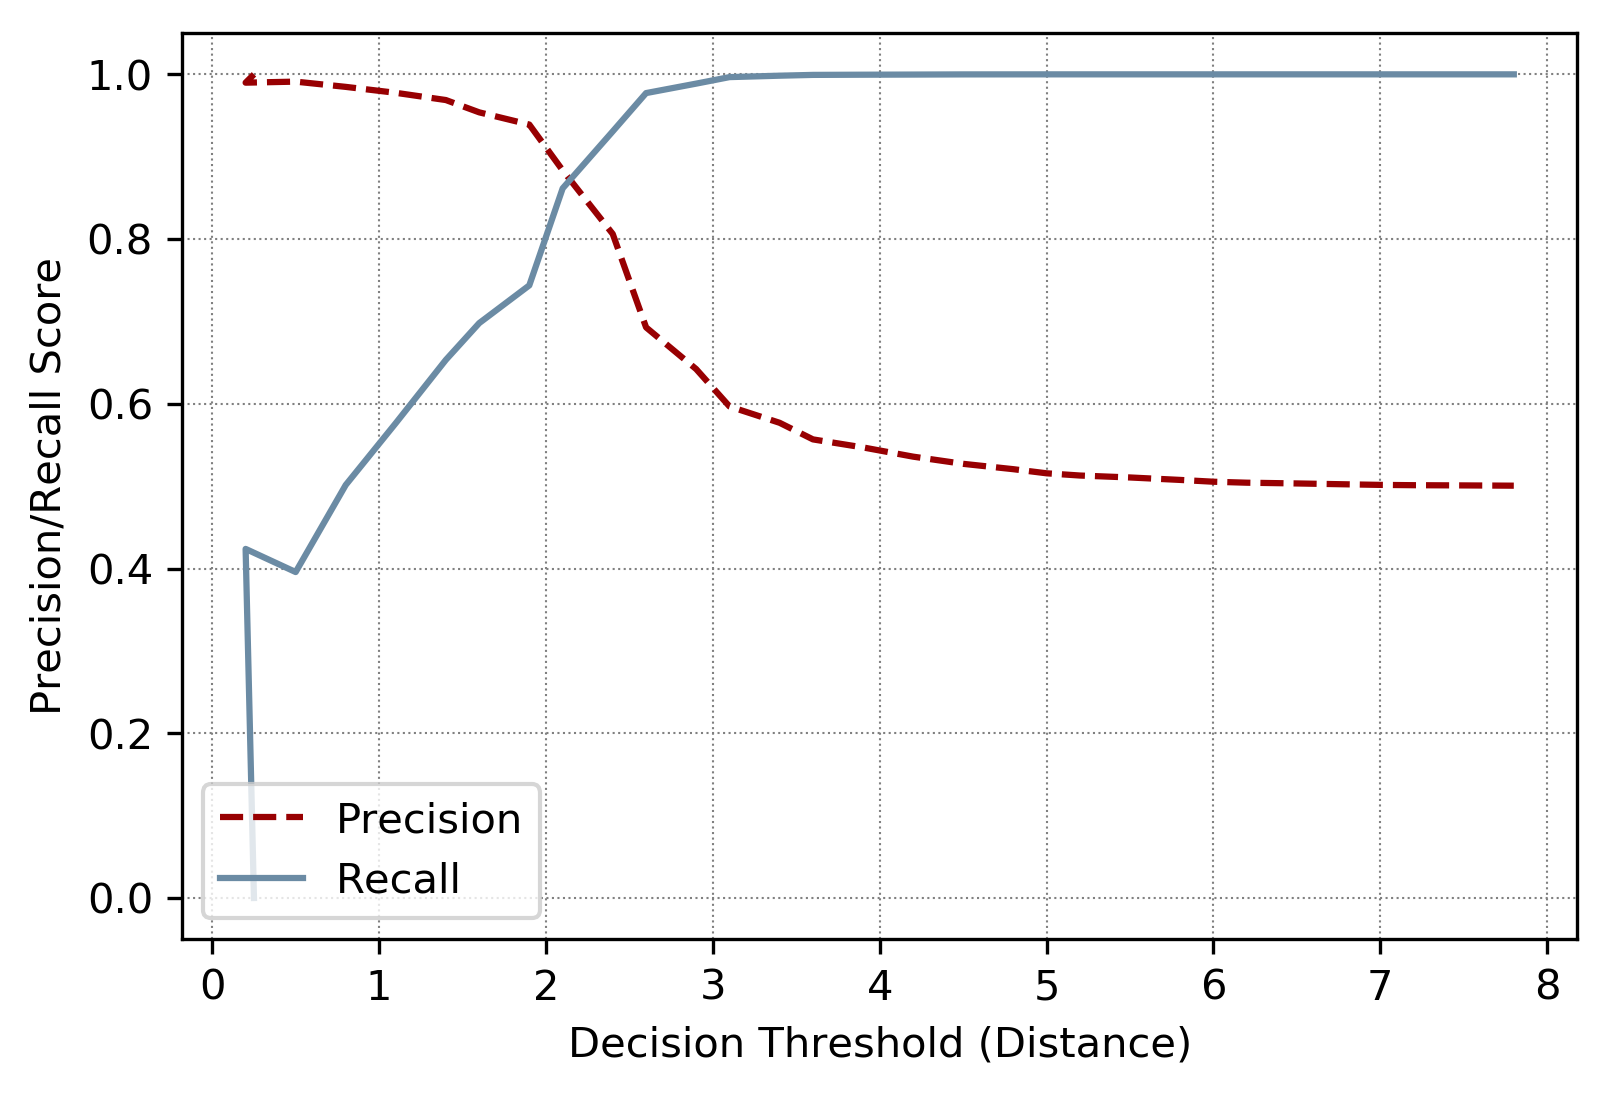

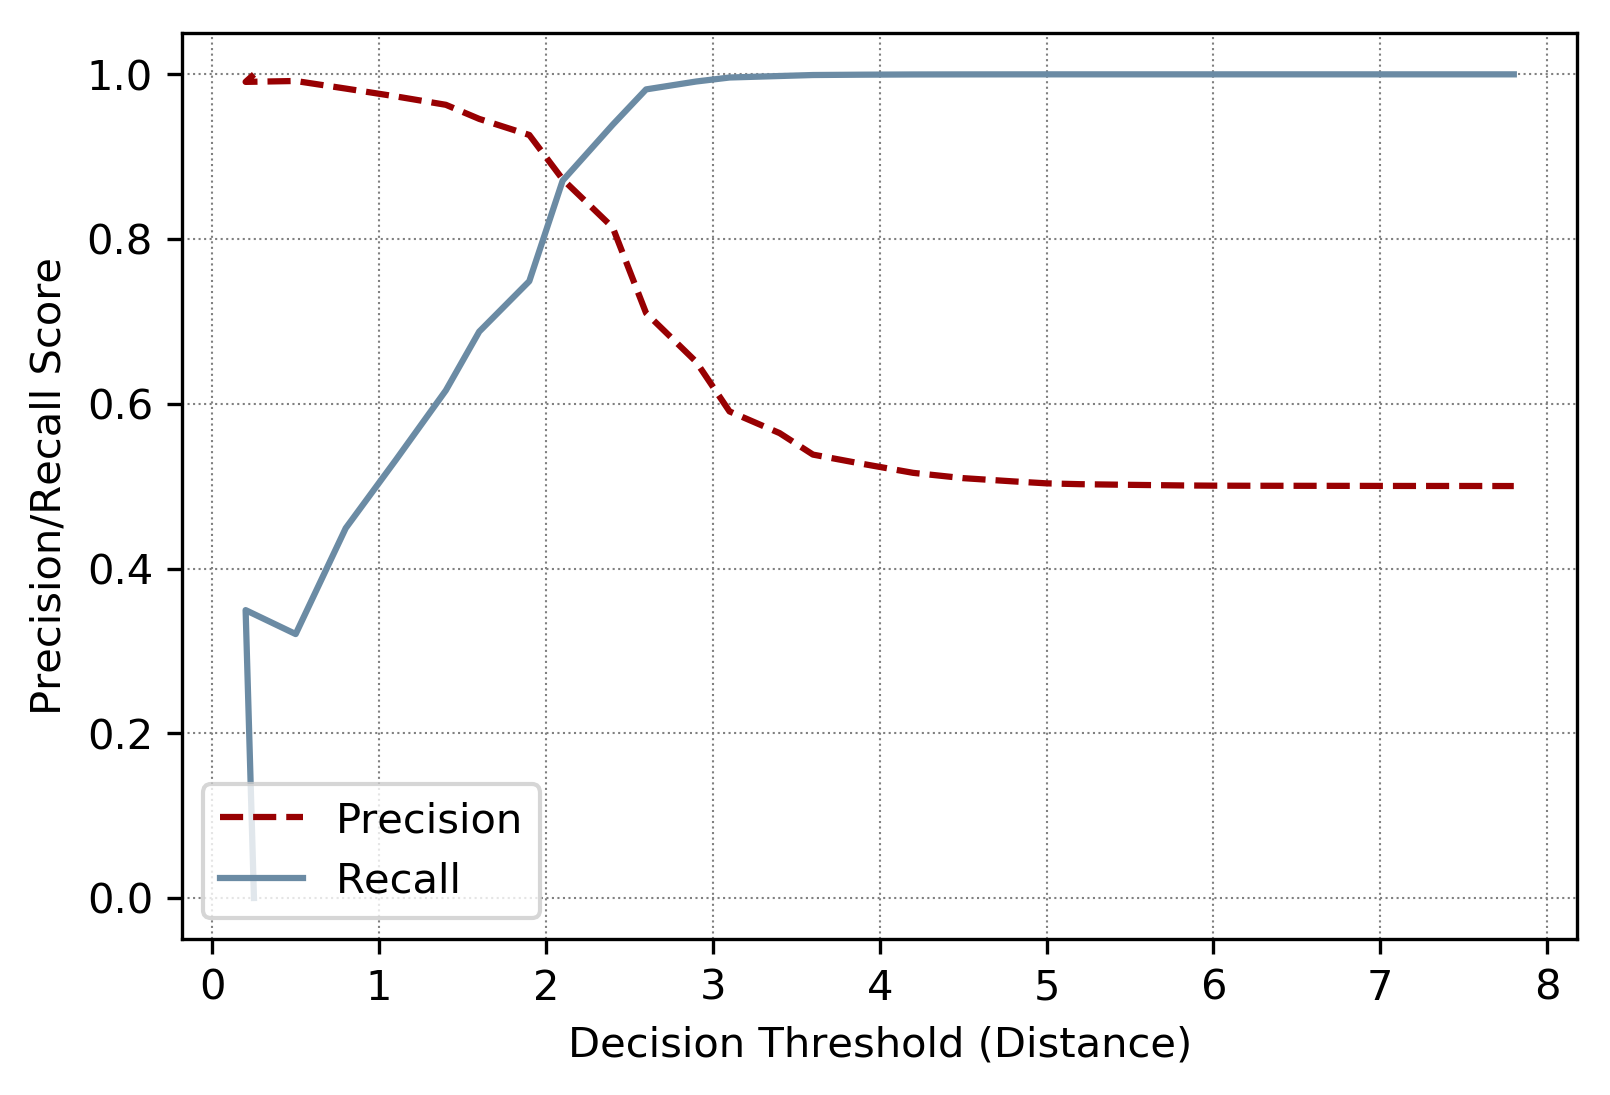

In [13]:
plot_precision_recall_vs_threshold(precision_base, recall_base, thresholds_base, '')
plot_precision_recall_vs_threshold(precision, recall, thresholds, '')
plot_precision_recall_vs_threshold(precision_ent, recall_ent, thresholds_ent, '')
plot_precision_recall_vs_threshold(precision_pcnn_ent, recall_pcnn_ent, thresholds_pcnn_ent, '')
plot_precision_recall_vs_threshold(precision_pcnn_nodef, recall_pcnn_nodef, thresholds_pcnn_nodef, '')

In [14]:
def get_threshold(precisions, recalls, thresholds):
    precisions = np.array(precisions)
    recalls = np.array(recalls)
    thresholds = np.array(thresholds)
    idx = np.argwhere(np.diff(np.sign(precisions[:-1] - recalls[:-1]))).flatten()
    return thresholds[idx][0]

In [15]:
get_threshold(precision_pcnn_ent, recall_pcnn_ent, thresholds_pcnn_ent)

2.1

### Reformat Alignment Result & Calculate Performance

In [16]:
data_header = ['e1_kb', 'rel_kb', 'rel_id', 'e2_kb', 'e1_oie', 'rel_oie', 'e2_oie',
               'e1_kb_id', 'e2_kb_id', 'e1_oie_id', 'e2_oie_id',
               'e1_oie_root', 'e2_oie_root', 'gold_label']
test_align = pd.read_csv('dataset/test_align_gold_v2.tsv', sep='\t', header=None, names=data_header)

test_align['dist_cnn_no_def'] = predict_base_g['dist']
test_align['dist_cnn_def'] = predict_g['dist']
test_align['dist_cnn_def_ent'] = predict_ent_g['dist']
test_align['dist_pcnn_def_ent'] = predict_pcnn_ent_g['dist']
# test_align['dist_pcnn_att'] = predict_pcnn_att_g['dist']
test_align['dist_pcnn_no_def'] = predict_pcnn_nodef_g['dist']

t_cnn_no_def = get_threshold(precision_base, recall_base, thresholds_base)
t_cnn_def = get_threshold(precision, recall, thresholds)
t_cnn_def_ent = get_threshold(precision_ent, recall_ent, thresholds_ent)
t_pcnn_def_ent = get_threshold(precision_pcnn_ent, recall_pcnn_ent, thresholds_pcnn_ent)
# t_pcnn_att = get_threshold(precision_pcnn_att, recall_pcnn_att, thresholds_pcnn_att)
t_pcnn_nodef = get_threshold(precision_pcnn_nodef, recall_pcnn_nodef, thresholds_pcnn_nodef)

# t_cnn_no_def = get_threshold(precision_base_g, recall_base_g, thresholds_base_g)
# t_cnn_def = get_threshold(precision_g, recall_g, thresholds_g)
# t_cnn_def_ent = get_threshold(precision_ent_g, recall_ent_g, thresholds_ent_g)
# t_pcnn_def_ent = get_threshold(precision_pcnn_ent_g, recall_pcnn_ent_g, thresholds_pcnn_ent_g)
# # t_pcnn_att = get_threshold(precision_pcnn_att_g, recall_pcnn_att_g, thresholds_pcnn_att_g)
# t_pcnn_nodef = get_threshold(precision_pcnn_nodef_g, recall_pcnn_nodef_g, thresholds_pcnn_nodef_g)

# t_cnn_no_def = 2
# t_cnn_def = 2
# t_cnn_def_ent = 2
# t_pcnn_def_ent = 2.5
# t_pcnn_nodef = 2

t_cnn_def_ent += 0.05
t_cnn_def -= 0.1
t_pcnn_nodef -= 0.32
t_pcnn_def_ent -= 0.15

test_align['pred_cnn_no_def'] = [0 if d <= t_cnn_no_def else 1 for d in test_align['dist_cnn_no_def']]
test_align['pred_cnn_def'] = [0 if d <= t_cnn_def else 1 for d in test_align['dist_cnn_def']]
test_align['pred_cnn_def_ent'] = [0 if d <= t_cnn_def_ent else 1 for d in test_align['dist_cnn_def_ent']]
test_align['pred_pcnn_def_ent'] = [0 if d <= t_pcnn_def_ent else 1 for d in test_align['dist_pcnn_def_ent']]
# test_align['pred_pcnn_att'] = [0 if d <= t_pcnn_att else 1 for d in test_align['dist_pcnn_att']]
test_align['pred_pcnn_no_def'] = [0 if d <= t_pcnn_nodef else 1 for d in test_align['dist_pcnn_no_def']]
test_align['pred_base'] = 0

test_align = test_align[[
                'e1_kb', 'e1_kb_id', 'rel_kb', 'rel_id', 'e2_kb', 'e2_kb_id',
                'e1_oie', 'e1_oie_id', 'rel_oie', 'e2_oie', 'e2_oie_id',
                'dist_cnn_no_def', 'dist_cnn_def', 'dist_cnn_def_ent',  'dist_pcnn_no_def', 'dist_pcnn_def_ent',
                'pred_cnn_no_def', 'pred_cnn_def', 'pred_cnn_def_ent', 'pred_pcnn_no_def', 'pred_pcnn_def_ent',
                'pred_base', 'gold_label']]

In [17]:
eval_table = pd.DataFrame(index=['base', 'dutta', 'CESI', 'CNN_no_def', 'CNN_def', 'CNN_def_ent', 'PCNN_no_def', 'PCNN_def_ent'])
eval_table = eval_table.fillna(0) # with 0s rather than NaNs

In [18]:
accuracy_score(test_align['gold_label'], test_align['pred_pcnn_no_def']), t_pcnn_nodef

(0.6525, 1.78)

#### Add base result to the eval_table

In [19]:
test_align

,e1_kb,e1_kb_id,rel_kb,rel_id,e2_kb,e2_kb_id,e1_oie,e1_oie_id,rel_oie,e2_oie,...,dist_cnn_def_ent,dist_pcnn_no_def,dist_pcnn_def_ent,pred_cnn_no_def,pred_cnn_def,pred_cnn_def_ent,pred_pcnn_no_def,pred_pcnn_def_ent,pred_base,gold_label
0,Cronus,Q44204,child,P40,Zeus,Q34201,Cronus,Q44204,' son is,Zeus,...,1.799759,0.877281,1.288314,0,0,0,0,0,0,0
1,A Royal Christmas,Q18611433,distributor,P750,Hallmark Channel,Q15501374,Royal Christmas,Q18611433,aired on,Hallmark Channel,...,1.547847,1.663321,0.793276,1,1,0,0,0,0,0
2,Mystic Ark,Q6948921,developer,P178,Produce,Q7247680,Mystic Ark,Q6948921,also developed by,Produce,...,0.003121,0.230705,0.000002,0,0,0,0,0,0,0
3,Nisqually River,Q829444,mouth of the watercourse,P403,Puget Sound,Q604141,Nisqually River,Q829444,also lived throughout,Puget Sound,...,1.833181,1.727612,1.798622,1,1,0,0,0,0,1
4,Big Fish,Q278997,filming location,P915,Alabama,Q173,Big Fish,Q278997,Apart was entirely shot in,Alabama,...,0.205154,1.300074,0.289067,1,0,0,0,0,0,0
5,Jane Menelaus,Q2063601,spouse,P26,Geoffrey Rush,Q166272,Jane Menelaus,Q2063601,appeared with,Geoffrey Rush,...,1.715418,1.348274,1.147111,1,0,0,0,0,0,1
6,Diddy Kong,Q10904385,present in work,P1441,Donkey Kong Country,Q518987,Diddy Kong,Q10904385,appearing in,Donkey Kong Country,...,1.735710,1.811887,1.451384,1,0,0,1,0,0,0
7,Deadpool,Q1631090,member of,P463,X-Force,Q938034,Deadpool,Q1631090,appearing in,X-Force,...,1.495564,0.008975,1.440919,1,1,0,0,0,0,0
8,Stony Brook Seawolves,Q7619507,represents,P1268,Stony Brook University,Q969850,Stony Brook Seawolves,Q7619507,are athletic teams of,Stony Brook University,...,1.755297,0.190408,0.451152,0,0,0,0,0,0,1
9,Garuda,Q188676,facet of,P1269,Buddhism,Q748,Garuda,Q188676,are birds In,Buddhism,...,2.149507,1.515053,0.365961,1,0,1,0,0,0,0


In [20]:
rel_aliases = pd.read_csv('dataset/relation_desc_aliases.tsv', sep='\t', header=None, names=['id', 'rel', 'desc', 'len_desc', 'aliases'])
aliases_dict = {}
for i in range(len(rel_aliases)):
    aliases = rel_aliases['aliases'][i]
    if isinstance(aliases, str):
        aliases_dict[rel_aliases['id'][i]] = aliases.split(', ')
    else:
        aliases_dict[rel_aliases['id'][i]] = [rel_aliases['rel'][i]]

In [21]:
def handle_same_entities(rel_kb_id, rel_oie):
    aliases = aliases_dict[rel_kb_id]
    for alias in aliases:
        if alias == rel_oie or (rel_oie in alias) or (alias in rel_oie):
            return 0
    return 1

In [22]:
# dissimilar_ids = []
for i in range(len(test_align)):
    e1_kb_id = test_align['e1_kb_id'][i]
    e2_kb_id = test_align['e2_kb_id'][i]
    e1_oie_id = test_align['e1_oie_id'][i]
    e2_oie_id = test_align['e2_oie_id'][i]
    e1_kb = test_align['e1_kb'][i]
    e2_kb = test_align['e2_kb'][i]
    e1_oie = test_align['e1_oie'][i]
    e2_oie = test_align['e2_oie'][i]
    rel_kb_id = test_align['rel_id'][i]
    rel_oie = test_align['rel_oie'][i]
    if (e1_oie_id == e1_kb_id or e1_kb == e1_oie) and (e2_oie_id == e2_kb_id or e2_kb == e2_oie):
        test_align.loc[i, 'pred_base'] = 0
    else:
        test_align.loc[i, 'pred_base'] = 1

In [23]:
gold = list(test_align['gold_label'])
pred_base = list(test_align['pred_base'])
index = 'base'
eval_table.at[index, 'acc'] = accuracy_score(gold, pred_base)
eval_table.at[index, 'prec_pos'] = precision_score(gold, pred_base, pos_label=0, average='binary')
eval_table.at[index, 'rec_pos'] = recall_score(gold, pred_base, pos_label=0, average='binary')
eval_table.at[index, 'f1_pos'] = f1_score(gold, pred_base, pos_label=0, average='binary')
eval_table.at[index, 'prec_neg'] = precision_score(gold, pred_base, pos_label=1, average='binary')
eval_table.at[index, 'rec_neg'] = recall_score(gold, pred_base, pos_label=1, average='binary')
eval_table.at[index, 'f1_neg'] = f1_score(gold, pred_base, pos_label=1, average='binary')

/home/rifkiaputri/anaconda2/envs/nlp_project/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/rifkiaputri/anaconda2/envs/nlp_project/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [24]:
pred_base.count(1)

0

#### Add dutta result to the eval_table

In [25]:
with open('dutta/align.p', 'rb') as fp:
    dutta_dict = pickle.load(fp)

In [26]:
pred_dutta = []
for i in range(len(test_align)):
    rel_kb = test_align['rel_id'][i]
    rel_oie = test_align['rel_oie'][i]
    pred_list = dutta_dict[rel_kb]
    if rel_oie in pred_list:
        pred_dutta.append(0)
    else:
        pred_dutta.append(1)

In [27]:
pred_dutta.count(0)

173

In [28]:
index = 'dutta'
eval_table.at[index, 'acc'] = accuracy_score(gold, pred_dutta)
eval_table.at[index, 'prec_pos'] = precision_score(gold, pred_dutta, pos_label=0, average='binary')
eval_table.at[index, 'rec_pos'] = recall_score(gold, pred_dutta, pos_label=0, average='binary')
eval_table.at[index, 'f1_pos'] = f1_score(gold, pred_dutta, pos_label=0, average='binary')
eval_table.at[index, 'prec_neg'] = precision_score(gold, pred_dutta, pos_label=1, average='binary')
eval_table.at[index, 'rec_neg'] = recall_score(gold, pred_dutta, pos_label=1, average='binary')
eval_table.at[index, 'f1_neg'] = f1_score(gold, pred_dutta, pos_label=1, average='binary')

#### Add cesi result to the eval_table

In [29]:
import json

In [30]:
with open('predict/cesi/rel_to_cluster_id.json') as json_data:
    rel_to_cluster_id = json.load(json_data)

In [31]:
cesi_predict = []
for i in range(len(test_align)):
    rel_kb = test_align['rel_kb'][i]
    rel_oie = test_align['rel_oie'][i]
    id_kb = rel_to_cluster_id.get(rel_kb, None)
    id_oie = rel_to_cluster_id.get(rel_oie, None)
    if id_kb == id_oie:
        cesi_predict.append(0)
    else:
        cesi_predict.append(1)

In [32]:
gold = list(test_align['gold_label'])
index = 'CESI'
eval_table.at[index, 'acc'] = accuracy_score(gold, cesi_predict)
eval_table.at[index, 'prec_pos'] = precision_score(gold, cesi_predict, pos_label=0, average='binary')
eval_table.at[index, 'rec_pos'] = recall_score(gold, cesi_predict, pos_label=0, average='binary')
eval_table.at[index, 'f1_pos'] = f1_score(gold, cesi_predict, pos_label=0, average='binary')
eval_table.at[index, 'prec_neg'] = precision_score(gold, cesi_predict, pos_label=1, average='binary')
eval_table.at[index, 'rec_neg'] = recall_score(gold, cesi_predict, pos_label=1, average='binary')
eval_table.at[index, 'f1_neg'] = f1_score(gold, cesi_predict, pos_label=1, average='binary')

#### Add model result to the eval_table

In [33]:
indexes = [
    ('dist_cnn_no_def', 'pred_cnn_no_def', 'CNN_no_def'),
    ('dist_cnn_def', 'pred_cnn_def', 'CNN_def'),
    ('dist_cnn_def_ent', 'pred_cnn_def_ent', 'CNN_def_ent'),
    ('dist_pcnn_no_def', 'pred_pcnn_no_def', 'PCNN_no_def'),
    ('dist_pcnn_def_ent', 'pred_pcnn_def_ent', 'PCNN_def_ent'),
]

for i in indexes:
    score_label = i[0]
    pred_label = i[1]
    index = i[2]

    gold = list(test_align['gold_label'])
    pred = list(test_align[pred_label])
#     score = list(test_align[score_label])
    
    eval_table.at[index, 'acc'] = accuracy_score(gold, pred)
    eval_table.at[index, 'prec_pos'] = precision_score(gold, pred, pos_label=0, average='binary')
    eval_table.at[index, 'rec_pos'] = recall_score(gold, pred, pos_label=0, average='binary')
    eval_table.at[index, 'f1_pos'] = f1_score(gold, pred, pos_label=0, average='binary')
    eval_table.at[index, 'prec_neg'] = precision_score(gold, pred, pos_label=1, average='binary')
    eval_table.at[index, 'rec_neg'] = recall_score(gold, pred, pos_label=1, average='binary')
    eval_table.at[index, 'f1_neg'] = f1_score(gold, pred, pos_label=1, average='binary')
    
#     fpr, tpr, thresholds = roc_curve(gold, score, pos_label=0)
#     eval_table.at[index, 'auc'] = auc(fpr, tpr)

In [34]:
eval_table

,acc,prec_pos,rec_pos,f1_pos,prec_neg,rec_neg,f1_neg
base,0.6450,0.645000,1.000000,0.784195,0.000000,0.000000,0.000000
dutta,0.5625,0.739884,0.496124,0.593968,0.427313,0.683099,0.525745
CESI,0.3975,1.000000,0.065891,0.123636,0.370757,1.000000,0.540952
CNN_no_def,0.5850,0.742105,0.546512,0.629464,0.442857,0.654930,0.528409
CNN_def,0.6275,0.726141,0.678295,0.701403,0.477987,0.535211,0.504983
CNN_def_ent,0.6325,0.659026,0.891473,0.757825,0.450980,0.161972,0.238342
PCNN_no_def,0.6525,0.677612,0.879845,0.765599,0.523077,0.239437,0.328502
PCNN_def_ent,0.6550,0.668539,0.922481,0.775244,0.545455,0.169014,0.258065


In [35]:
test_align.to_csv('predict/data_'+version+'/gold_result.tsv', index=False, sep='\t')

In [36]:
cesi_predict.count(1)

383

In [38]:
test_align['pred_dutta'] = pred_dutta
test_align['pred_cesi'] = cesi_predict

In [39]:
test_align.to_csv('predict/data_'+version+'/gold_result.tsv', index=False, sep='\t')

In [40]:
list(test_align['pred_pcnn_def_ent']).count(1), list(test_align['gold_label']).count(1)

(44, 142)

In [41]:
t_cnn_no_def, t_cnn_def, t_cnn_def_ent, t_pcnn_def_ent, t_pcnn_nodef

(1.6, 1.7999999999999998, 1.95, 1.9500000000000002, 1.78)

In [70]:
# pick_idx_pos = [53, 56, 67, 0, 23]
# pick_idx_neg = [281, 395, 28, 285, 170]
pick_idx_pos = [54, 57, 73, 319, 208]
pic_idx_pos_diff = [0, 242, 320, 140, 66]
pick_idx_neg = [286, 83, 27, 290, 178]

In [71]:
test_align.loc[pick_idx_pos]

,e1_kb,e1_kb_id,rel_kb,rel_id,e2_kb,e2_kb_id,e1_oie,e1_oie_id,rel_oie,e2_oie,...,dist_pcnn_def_ent,pred_cnn_no_def,pred_cnn_def,pred_cnn_def_ent,pred_pcnn_no_def,pred_pcnn_def_ent,pred_base,gold_label,pred_dutta,pred_cesi
54,Munavvar Kalantarli,Q195427,place of death,P20,Baku,Q9248,Munavvar Kalantarli,Q195427,died in,Baku,...,0.023830,0,0,0,0,0,0,0,0,1
57,James Louis Sobieski,Q507964,cause of death,P509,stroke,Q12202,James Louis Sobieski,Q507964,died of,stroke,...,0.124116,0,0,0,0,0,0,0,0,1
73,Denmark,Q35,member of,P463,NATO,Q7184,Denmark,Q35,founding member of,NATO,...,0.928422,0,0,0,0,0,0,0,1,0
319,Le Dernier Combat,Q386210,filming location,P915,Paris,Q90,Le Dernier Combat,Q386210,was filmed in,Paris,...,0.134442,0,0,0,0,0,0,0,0,1
208,Tegucigalpa,Q3238,capital of,P1376,Honduras,Q783,Tegucigalpa,Q3238,permanent capital of,Honduras,...,0.190316,0,0,0,0,0,0,0,1,0


In [72]:
test_align.loc[pic_idx_pos_diff]

,e1_kb,e1_kb_id,rel_kb,rel_id,e2_kb,e2_kb_id,e1_oie,e1_oie_id,rel_oie,e2_oie,...,dist_pcnn_def_ent,pred_cnn_no_def,pred_cnn_def,pred_cnn_def_ent,pred_pcnn_no_def,pred_pcnn_def_ent,pred_base,gold_label,pred_dutta,pred_cesi
0,Cronus,Q44204,child,P40,Zeus,Q34201,Cronus,Q44204,' son is,Zeus,...,1.288314,0,0,0,0,0,0,0,1,1
242,Hajime Isayama,Q3782468,notable work,P800,Attack on Titan,Q586025,Hajime Isayama,Q3782468,'s serial is,Attack on Titan,...,1.814879,0,0,0,0,0,0,0,1,1
320,Gratian,Q189108,spouse,P26,Flavia Maxima Constantia,Q437472,Gratian,Q189108,was first married to,Flavia Maxima Constantia,...,0.558249,0,0,0,0,0,0,0,1,1
140,Le Chiffre,Q2136439,present in work,P1441,Casino Royale,Q591272,Le Chiffre,Q2136439,is main villain of,Casino Royale,...,0.152486,1,1,0,0,0,0,0,0,1
66,Golden Fishery,Q385198,original language of work,P364,Korean,Q9176,Golden Fishery,Q385198,first aired with,Korean,...,1.245994,1,1,0,0,0,0,0,1,1


In [73]:
test_align.loc[pick_idx_neg]

,e1_kb,e1_kb_id,rel_kb,rel_id,e2_kb,e2_kb_id,e1_oie,e1_oie_id,rel_oie,e2_oie,...,dist_pcnn_def_ent,pred_cnn_no_def,pred_cnn_def,pred_cnn_def_ent,pred_pcnn_no_def,pred_pcnn_def_ent,pred_base,gold_label,pred_dutta,pred_cesi
286,William Tailer,Q8019153,place of death,P20,Dorchester,Q1024037,William Tailer,Q8019153,was born in,Dorchester,...,0.389531,0,0,0,0,0,0,1,0,1
83,Sharon Creech,Q510811,nominated for,P1411,Newbery Medal,Q622813,Sharon Creech,Q510811,have won,Newbery Medal,...,1.827601,0,0,0,0,0,0,1,1,1
27,Jeconiah,Q319049,place of death,P20,Babylon,Q5684,Jeconiah,Q319049,began trip to,Babylon,...,1.281559,1,0,1,1,0,0,1,1,1
290,Stefanie SchÃ¼ler-Springorum,Q2338281,work location,P937,Hamburg,Q1055,Stefanie SchÃ¼ler-Springorum,Q2338281,was born in,Hamburg,...,1.473261,0,0,0,0,0,0,1,0,1
178,Aeneas,Q82732,father,P22,Anchises,Q211953,Aeneas,Q82732,leave,Anchises,...,2.044399,1,1,1,1,1,0,1,1,1
